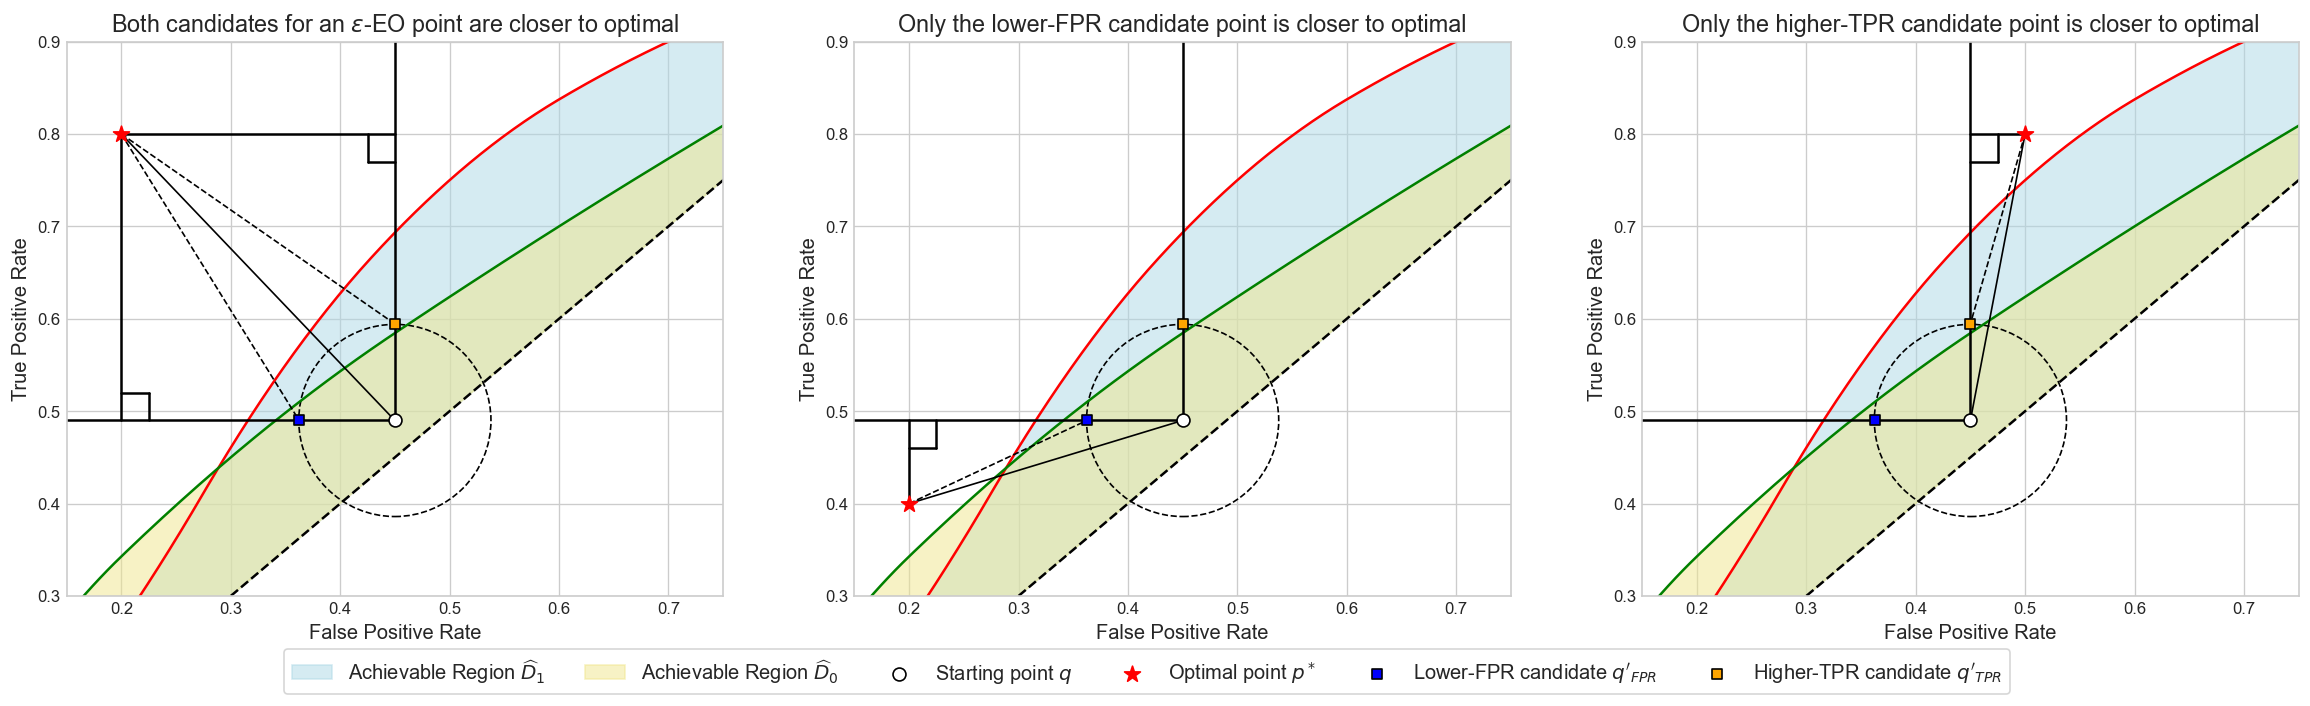

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

TITLE_FONTSIZE = 14
LABEL_FONTSIZE = 12
TICKS_FONTSIZE = 10
PLOT_STYLE = "seaborn-v0_8-whitegrid"

plt.style.use(style=PLOT_STYLE)
mpl.rcParams['axes.titlesize'] = TITLE_FONTSIZE
mpl.rcParams['axes.labelsize'] = LABEL_FONTSIZE
mpl.rcParams['xtick.labelsize'] = TICKS_FONTSIZE
mpl.rcParams['ytick.labelsize'] = TICKS_FONTSIZE

red_x = [0, 0.2, 0.35, 0.5, 0.7, 1]
red_y = [0, 0.27, 0.55, 0.75, 0.9, 1]

green_x = [0, 0.1, 0.3, 0.6, 0.9, 1]
green_y = [0, 0.2, 0.45, 0.7, 0.92, 1]

xnew = np.linspace(0, 1, 300)
spl_red = make_interp_spline(red_x, red_y, k=2)
red_smooth = spl_red(xnew)

spl_green = make_interp_spline(green_x, green_y, k=2)
green_smooth = spl_green(xnew)

L0_index = -100
L1_index = 80
q_L0 = (xnew[L0_index], green_smooth[L0_index])
q_L1 = (xnew[L1_index], red_smooth[L1_index])

qx = 0.45
qy = 0.49
px = 0.2
py = 0.8
square_size = 0.03
square_size_x = 0.025
square_size_y = 0.03

horizontal_x = 0.3625
horizontal_y = qy

vertical_x = qx
vertical_y = 0.5945

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 6), sharex=False, sharey=False, dpi=120)
axes = axes.ravel()

axes[0].plot(xnew, red_smooth, 'r-')
axes[0].plot(xnew, green_smooth, 'g-')
axes[0].fill_between(xnew, red_smooth, xnew, color='lightblue', alpha=0.5, label='Achievable Region $\widehat{D}_1$', interpolate=True)
axes[0].fill_between(xnew, green_smooth, xnew, color='khaki', alpha=0.5, label='Achievable Region $\widehat{D}_0$', interpolate=True)
axes[0].plot([0, 1], [0, 1], color='black', linestyle='--')
axes[0].scatter([qx], [qy], color='black', label='Starting point $q$', s=60, facecolors='white', edgecolors='black', linestyle='-', zorder=10)
axes[0].scatter([qx], [qy], color='black', marker='o', s=13300, facecolors='none', edgecolors='black', linestyle='--')
axes[0].scatter([px], [py], color='black', label="Optimal point $p^*$", marker='*', s=100, facecolors='red', edgecolors='red', zorder=10)
axes[0].scatter([horizontal_x], [horizontal_y], color='black', label="Lower-FPR candidate $q'_{FPR}$", s=40, marker='s', facecolors='blue', zorder=10)
axes[0].scatter([vertical_x], [vertical_y], color='black', label="Higher-TPR candidate $q'_{TPR}$", s=40, marker='s', facecolors='orange', zorder=10)
axes[0].plot([0.0, qx], [qy, qy], color='black', linestyle='-')
axes[0].plot([qx, qx], [qy, 1.0], color='black', linestyle='-')
axes[0].plot([px, qx], [py, qy], color='black', linestyle='-', linewidth=1)
axes[0].plot([px, px], [py, qy], color='black', linestyle='-', linewidth=1.5)
axes[0].plot([px, qx], [py, py], color='black', linestyle='-', linewidth=1.5)
axes[0].plot([px, horizontal_x], [py, horizontal_y], color='black', linestyle='--', linewidth=1)
axes[0].plot([px, vertical_x], [py, vertical_y], color='black', linestyle='--', linewidth=1)
axes[0].plot([px, px + square_size_x], [qy + square_size_y, qy + square_size_y], color='black', linestyle='-', linewidth=1.5)
axes[0].plot([px + square_size_x, px + square_size_x], [qy, qy + square_size_y], color='black', linestyle='-', linewidth=1.5)
axes[0].plot([qx - square_size_x, qx - square_size_x], [py, py - square_size_y], color='black', linestyle='-', linewidth=1.5)
axes[0].plot([qx - square_size_x, qx], [py - square_size_y, py - square_size_y], color='black', linestyle='-', linewidth=1.5)

axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Both candidates for an $\epsilon$-EO point are closer to optimal')
axes[0].set_xlim(0.15, 0.75)
axes[0].set_ylim(0.3, 0.9)

px = 0.2
py = 0.4

axes[1].plot(xnew, red_smooth, 'r-')
axes[1].plot(xnew, green_smooth, 'g-')
axes[1].fill_between(xnew, red_smooth, xnew, color='lightblue', alpha=0.5, label='Achievable Region $\widehat{D}_1$', interpolate=True)
axes[1].fill_between(xnew, green_smooth, xnew, color='khaki', alpha=0.5, label='Achievable Region $\widehat{D}_0$', interpolate=True)
axes[1].plot([0, 1], [0, 1], color='black', linestyle='--')
axes[1].scatter([qx], [qy], color='black', label='Starting point $q$', s=60, facecolors='white', edgecolors='black', linestyle='-', zorder=10)
axes[1].scatter([qx], [qy], color='black', marker='o', s=13300, facecolors='none', edgecolors='black', linestyle='--')
axes[1].scatter([px], [py], color='black', label="Optimal point $p^*$", marker='*', s=100, facecolors='red', edgecolors='red', zorder=10)
axes[1].scatter([horizontal_x], [horizontal_y], color='black', label="Lower-FPR candidate $q'_{FPR}$", s=40, marker='s', facecolors='blue', zorder=10)
axes[1].scatter([vertical_x], [vertical_y], color='black', label="Higher-TPR candidate $q'_{TPR}$", s=40, marker='s', facecolors='orange', zorder=10)
axes[1].plot([0.0, qx], [qy, qy], color='black', linestyle='-')
axes[1].plot([qx, qx], [qy, 1.0], color='black', linestyle='-')
axes[1].plot([px, qx], [py, qy], color='black', linestyle='-', linewidth=1)
axes[1].plot([px, px], [py, qy], color='black', linestyle='-', linewidth=1.5)
axes[1].plot([px, horizontal_x], [py, horizontal_y], color='black', linestyle='--', linewidth=1)
axes[1].plot([px, px + square_size_x], [qy - square_size_y, qy - square_size_y], color='black', linestyle='-', linewidth=1.5)
axes[1].plot([px + square_size_x, px + square_size_x], [qy, qy - square_size_y], color='black', linestyle='-', linewidth=1.5)

axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Only the lower-FPR candidate point is closer to optimal')
axes[1].set_xlim(0.15, 0.75)
axes[1].set_ylim(0.3, 0.9)

px = 0.5
py = 0.8

axes[2].plot(xnew, red_smooth, 'r-')
axes[2].plot(xnew, green_smooth, 'g-')
axes[2].fill_between(xnew, red_smooth, xnew, color='lightblue', alpha=0.5, label='Achievable Region $\widehat{D}_1$', interpolate=True)
axes[2].fill_between(xnew, green_smooth, xnew, color='khaki', alpha=0.5, label='Achievable Region $\widehat{D}_0$', interpolate=True)
axes[2].plot([0, 1], [0, 1], color='black', linestyle='--')
axes[2].scatter([qx], [qy], color='black', label='Starting point $q$', s=60, facecolors='white', edgecolors='black', linestyle='-', zorder=10)
axes[2].scatter([qx], [qy], color='black', marker='o', s=13300, facecolors='none', edgecolors='black', linestyle='--')
axes[2].scatter([px], [py], color='black', label="Optimal point $p^*$", marker='*', s=100, facecolors='red', edgecolors='red', zorder=10)
axes[2].scatter([horizontal_x], [horizontal_y], color='black', label="Lower-FPR candidate $q'_{FPR}$", s=40, marker='s', facecolors='blue', zorder=10)
axes[2].scatter([vertical_x], [vertical_y], color='black', label="Higher-TPR candidate $q'_{TPR}$", s=40, marker='s', facecolors='orange', zorder=10)
axes[2].plot([0.0, qx], [qy, qy], color='black', linestyle='-')
axes[2].plot([qx, qx], [qy, 1.0], color='black', linestyle='-')
axes[2].plot([px, qx], [py, qy], color='black', linestyle='-', linewidth=1)
axes[2].plot([px, qx], [py, py], color='black', linestyle='-', linewidth=1.5)
axes[2].plot([px, vertical_x], [py, vertical_y], color='black', linestyle='--', linewidth=1)
axes[2].plot([qx + square_size_x, qx + square_size_x], [py, py - square_size_y], color='black', linestyle='-', linewidth=1.5)
axes[2].plot([qx + square_size_x, qx], [py - square_size_y, py - square_size_y], color='black', linestyle='-', linewidth=1.5)

axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Only the higher-TPR candidate point is closer to optimal')
axes[2].set_xlim(0.15, 0.75)
axes[2].set_ylim(0.3, 0.9)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=6, frameon=True, bbox_to_anchor=(0.5, -0.04), fontsize=LABEL_FONTSIZE)
plt.show()
